# Robustness Analysis

In this notebook different simulations are run, and the results are extracted for presentation.

The reason for a notebook is that it's easier to do trial and error and saving partial results.

## Simulation 1

#### Setup 
- strategy: threatened habitats
- number of perturbations: 100

In [1]:
import sys
sys.path.append('..')

In [2]:
from robustness_analysis.graph import Graph
from robustness_analysis.metaweb import Metaweb, MetawebProcessor
import robustness_analysis.constants as Constants
from robustness_analysis.attack_strategy import ThreatenedHabitats
from robustness_analysis.metaweb import Preparation
from robustness_analysis.simulation import Simulation
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
metaweb_processor = MetawebProcessor(Constants.ALL_SPECIES_AND_FOOD_GROUPS, Constants.SPECIES_FOR_RANDOMIZED_LINKS)
metaweb = Metaweb(Constants.FOODWEB_02, usecols=[Constants.SOURCE_COL, Constants.TARGET_COL])
metaweb.prepare(Preparation.USE_AS_IS, metaweb_processor)
edge_df = metaweb.get_edges()

In [4]:
graph = Graph(edge_df, source=Constants.SOURCE_COL, target=Constants.TARGET_COL)

species_df = pd.read_csv(Constants.ALL_SPECIES_AND_FOOD_GROUPS, usecols=['Taxon', 'Habitat'])

graph.filter_nodes_out(species_df)  # filter out nodes which do not 
graph.update_attributes(species_df)

# take care of food-groups separately

In [ ]:
buckets = {
    '0': 0.05,
    '0.25': 0.07,
}

# when removing bucket point out probability issue

In [5]:
threatened_habitats = ["Grassland", "Forest"]
attack_strategy = ThreatenedHabitats(threatened_habitats)
attack_strategy.create_buckets(graph)

In [6]:
simulation = Simulation(graph, 100)
simulation.run()

Id: 0.3676 , Size: 19200
626
Id: 0.1893 , Size: 19100
673
Id: 0.3676 , Size: 19100
625
Id: 0.1893 , Size: 19000
673
Id: 0.3676 , Size: 19000
622
Id: 0.3676 , Size: 18900
647
Id: 0.1893 , Size: 18800
681
Id: 0.3676 , Size: 18800
647
Id: 0.1893 , Size: 18700
677
Id: 0.3676 , Size: 18700
646
Id: 0.3676 , Size: 18600
643
Id: 0.1893 , Size: 18500
688
Id: 0.3676 , Size: 18500
644
Id: 0.1893 , Size: 18300
686
Id: 0.3676 , Size: 18400
642
Id: 0.3676 , Size: 18300
640
Id: 0.1893 , Size: 18200
768
Id: 0.3676 , Size: 18200
639
Id: 0.1893 , Size: 18100
768
Id: 0.3676 , Size: 18100
640
Id: 0.1893 , Size: 18000
768
Id: 0.3676 , Size: 18000
632
Id: 0.1893 , Size: 17800
774
Id: 0.3676 , Size: 17900
629
Id: 0.1893 , Size: 17700
770
Id: 0.1893 , Size: 17600
769
Id: 0.3676 , Size: 17700
626
Id: 0.1893 , Size: 17500
786
Id: 0.3676 , Size: 17600
625
Id: 0.1893 , Size: 17400
786
Id: 0.3676 , Size: 17300
625
Id: 0.1893 , Size: 17300
786
Id: 0.3676 , Size: 17100
624
Id: 0.1893 , Size: 17100
786
Id: 0.3676 , S

In [10]:
results = simulation.get_results()
print(results)

{'number_of_wccs': [627.0, 627.0, 627.0, 627.0, 627.0, 629.0, 629.0, 629.0, 629.0, 650.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 652.0, 651.5, 651.5, 651.0, 651.0, 651.0, 651.0, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.5, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.5, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 649.0, 648.5, 648.5, 648.5, 648.5, 648.5, 

[[0.267004 0.004874 0.329415 1.      ]]


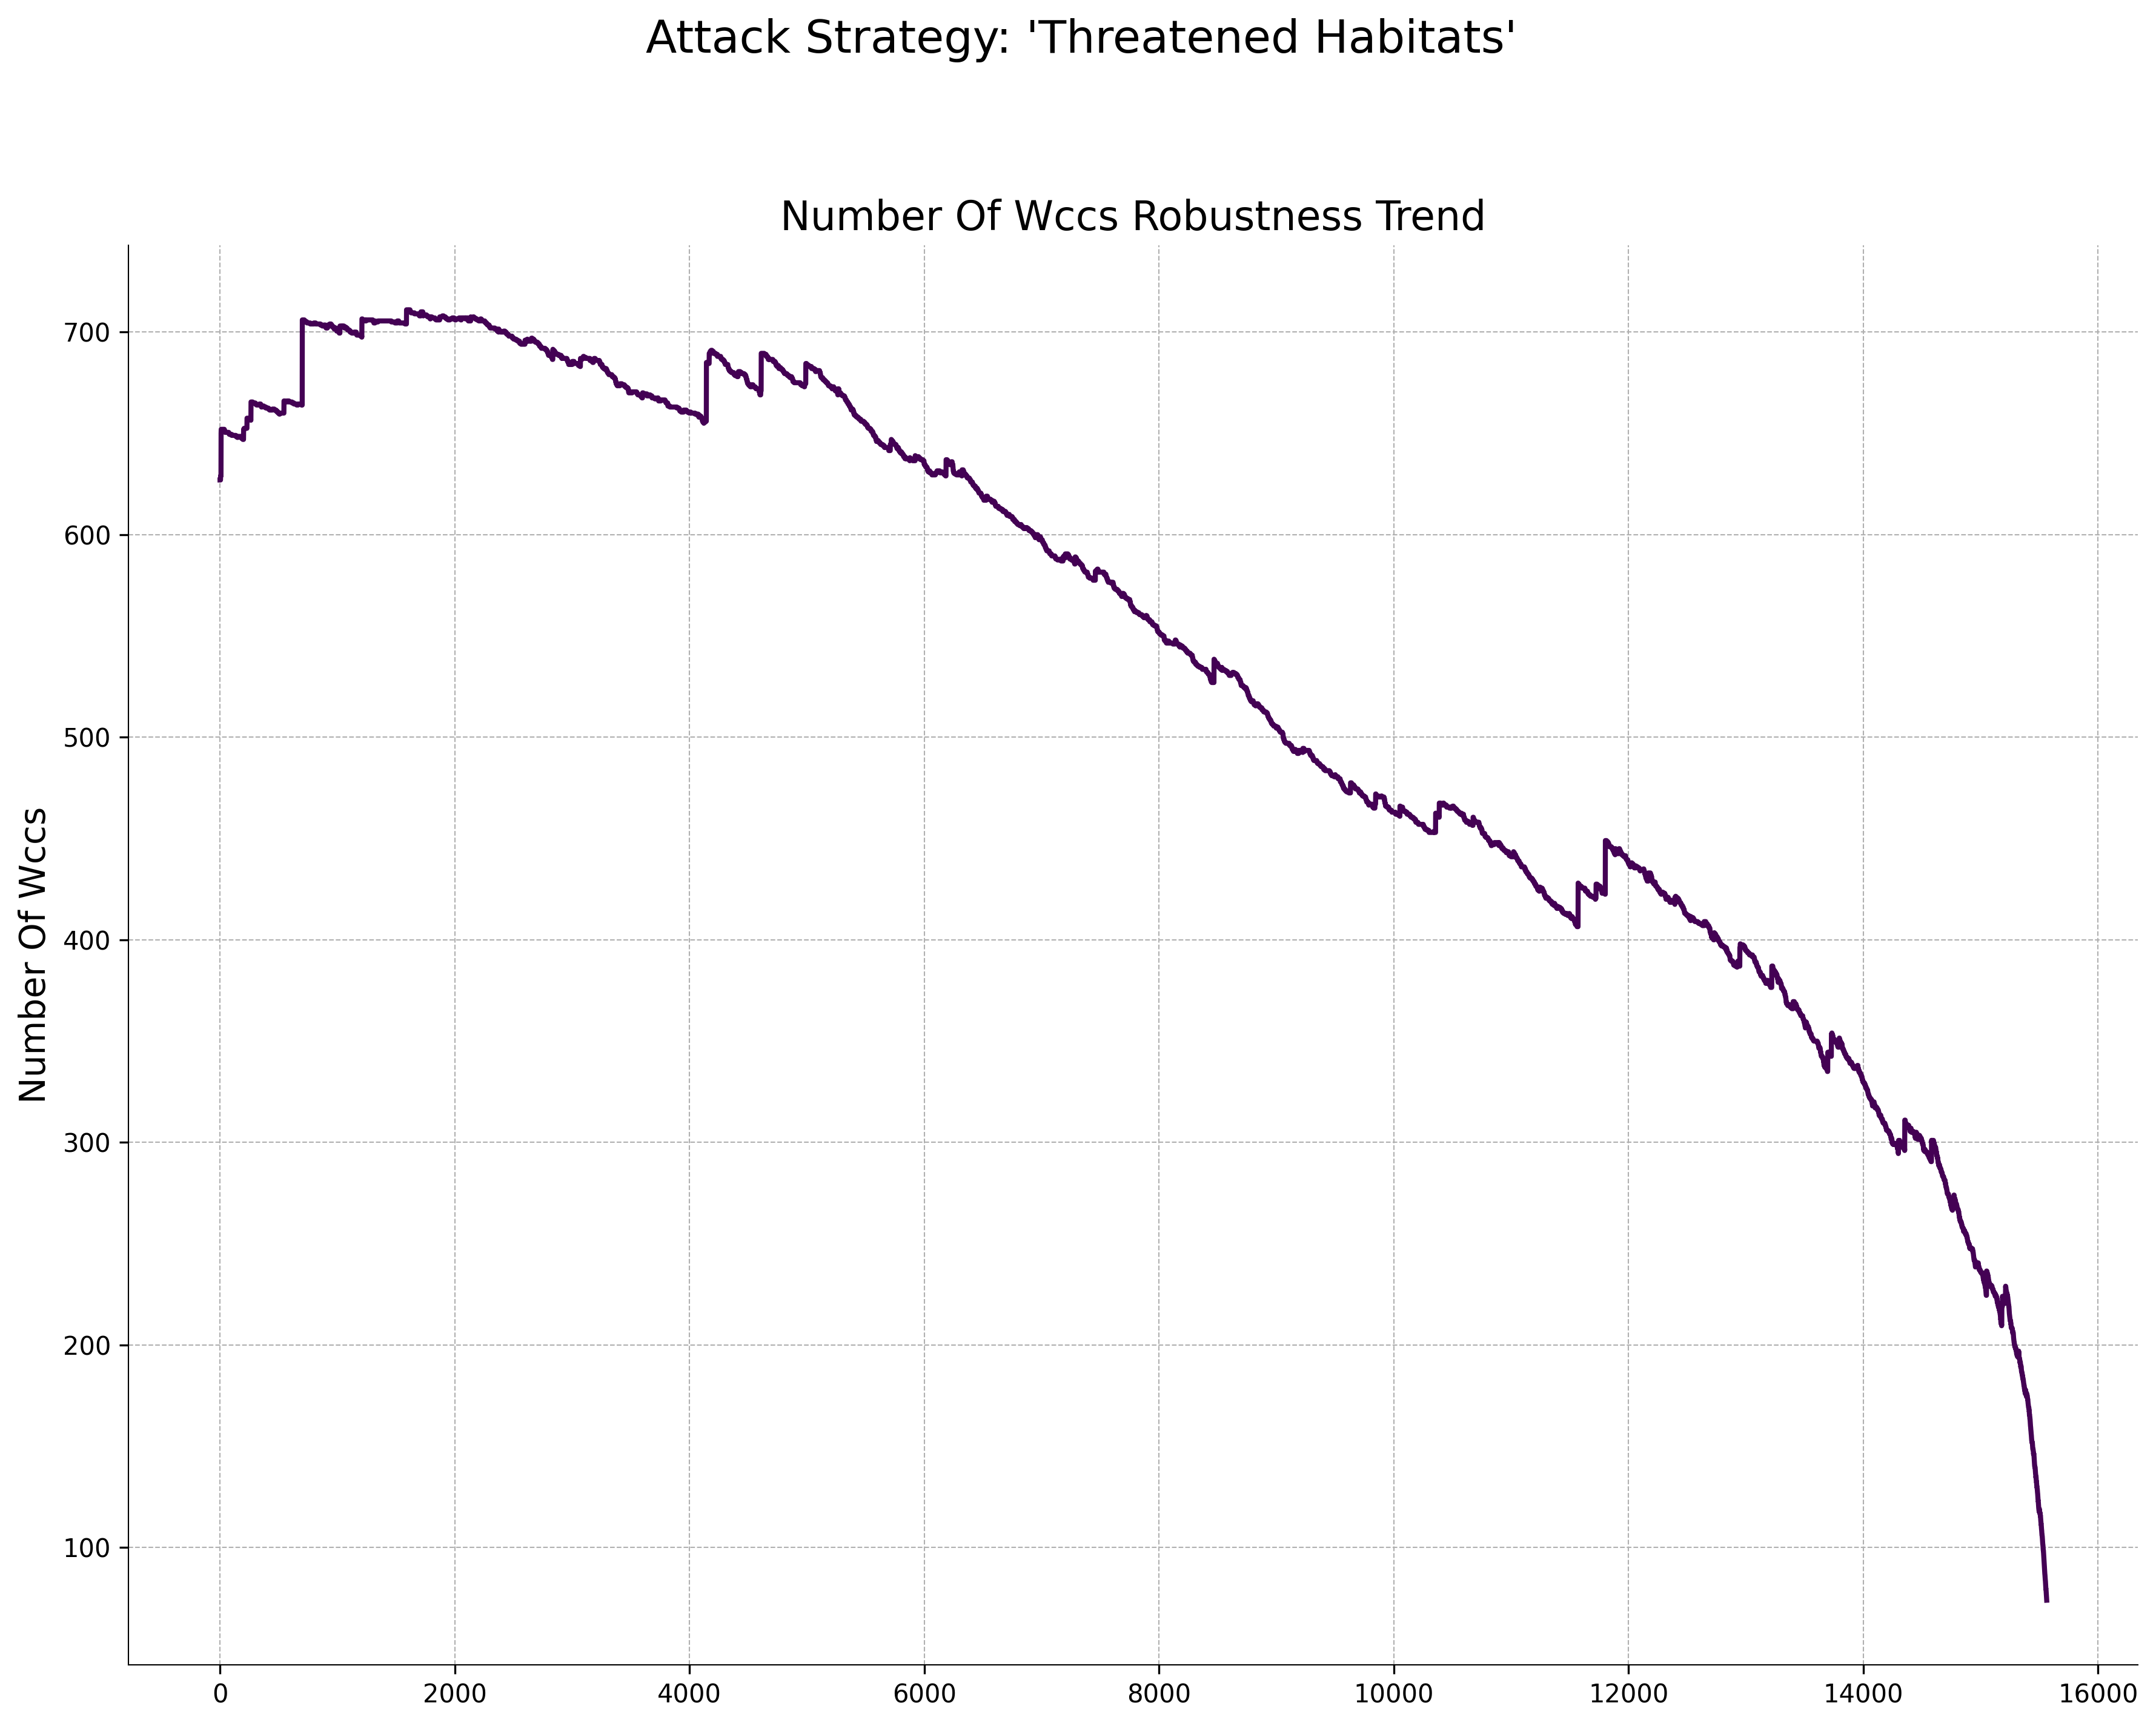

In [11]:
import matplotlib.pyplot as plt
import numpy as np

metric_names = list(results.keys())
colors = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))

print(colors)

num_rows = len(metric_names)

fig = plt.figure(figsize=(12, 9 * num_rows), dpi=300) 

for i, metric_name in enumerate(metric_names):
    ax = fig.add_subplot(num_rows, 1, i+1)  
    ax.plot(results[metric_name], color=colors[i], linestyle='-', linewidth=2)
    
    ax.set_ylabel(metric_name.replace("_", " ").title(), fontsize=14)
    ax.set_title(f'{metric_name.replace("_", " ").title()} Robustness Trend', fontsize=16)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

fig.suptitle('Attack Strategy: \'Threatened Habitats\'', fontsize=18, y=1.05)
plt.tight_layout()

plt.show()